In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
train = pd.read_csv("train.csv")
dev = pd.read_csv("dev.csv")

In [3]:
train.sample(5)

,id,source,sentence_1,sentence_2,label,binary-label
3409,boostcamp-sts-v1-train-3409,petition-sampled,향동역 신설요청합니다.,동남권 전철 광역화 요청합니다.,0.2,0.0
5412,boostcamp-sts-v1-train-5412,petition-sampled,본인들이 뭔데 가상화폐 규제하니 마니 하는거죠?,"주식,부동산은 왜 폐지 안시키나요??? (가상화폐 규제 반대)",1.4,0.0
7215,boostcamp-sts-v1-train-7215,nsmc-sampled,재밌어 재밌어 재밌어 ㅋㅋㅋ,재밌네 이거 ㅋㅋㅋ,3.6,1.0
4174,boostcamp-sts-v1-train-4174,nsmc-rtt,진정 사랑해 본 사람만이 이 영화가 주는 감정과 육체적 사랑으로 인한 메시지를 이해...,"진정으로 사랑해 본 사람만이 이 영화의 감정적, 육체적 메시지를 이해할 것이다. 그...",4.2,1.0
6075,boostcamp-sts-v1-train-6075,slack-sampled,다년간의 제주 체류(?)로 재미난 이야기들을 들려주셨습니다.,우리 회사 창업 건국신화 이전의 이야기들을 들려주셔서 재밌게 들었습니다.,1.2,0.0


In [4]:
dev.sample(5)

,id,source,sentence_1,sentence_2,label,binary-label
337,boostcamp-sts-v1-dev-337,nsmc-sampled,봐도봐도 지겹지않은 영화,정말 몇번 봐도 재미있는 영화,2.8,1.0
499,boostcamp-sts-v1-dev-499,petition-sampled,집값폭등과 금리인상,"세월호참사, 4대강사업 << 집값폭등",1.2,0.0
417,boostcamp-sts-v1-dev-417,slack-rtt,다음에 기회가 된다면 만나서 밥이라도 먹기루..!,다음에 기회가 된다면 만나서 밥먹자..!,4.2,1.0
89,boostcamp-sts-v1-dev-089,slack-sampled,와 사진.. 멋져요!!ㅎㅎ,와..오랜만에 사진열어보니.. 너무 다시 가고싶네요!!ㅎㅎ,1.4,0.0
303,boostcamp-sts-v1-dev-303,petition-rtt,화재연기감지기 오피스텔 내 오작동 관련 인명피해에 대한 대책마련,오피스텔 화재화재감지기 오동작으로 인한 인명피해 대책 마련,4.6,1.0


In [5]:
train.describe()

,label,binary-label
count,9324.000000,9324.000000
mean,1.849968,0.389532
std,1.602212,0.487670
min,0.000000,0.000000
25%,0.200000,0.000000
50%,1.600000,0.000000
75%,3.400000,1.000000
max,5.000000,1.000000


In [6]:
dev.describe()

,label,binary-label
count,550.000000,550.000000
mean,2.584000,0.520000
std,1.459483,0.500055
min,0.000000,0.000000
25%,1.400000,0.000000
50%,2.600000,1.000000
75%,3.800000,1.000000
max,5.000000,1.000000


<Axes: xlabel='label', ylabel='Count'>

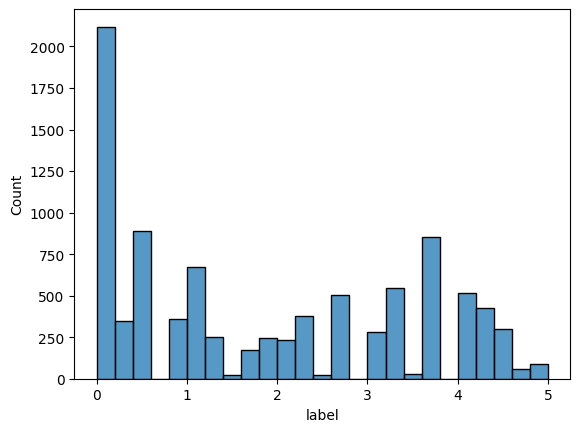

In [12]:
sns.histplot(train.label, binwidth=0.2)

<Axes: xlabel='label', ylabel='Count'>

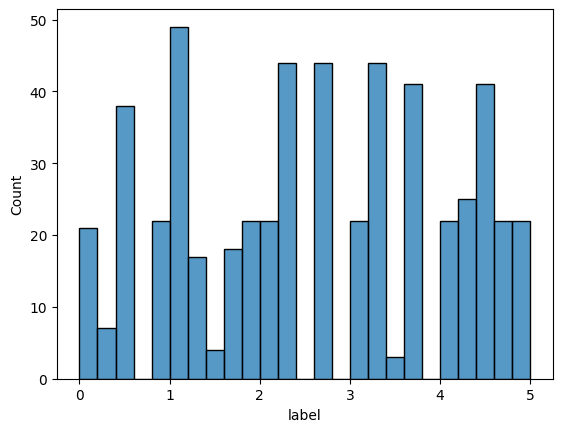

In [13]:
sns.histplot(dev.label, binwidth=0.2)

In [22]:
sources = sorted(train["source"].unique())
sources

['nsmc-rtt',
 'nsmc-sampled',
 'petition-rtt',
 'petition-sampled',
 'slack-rtt',
 'slack-sampled']

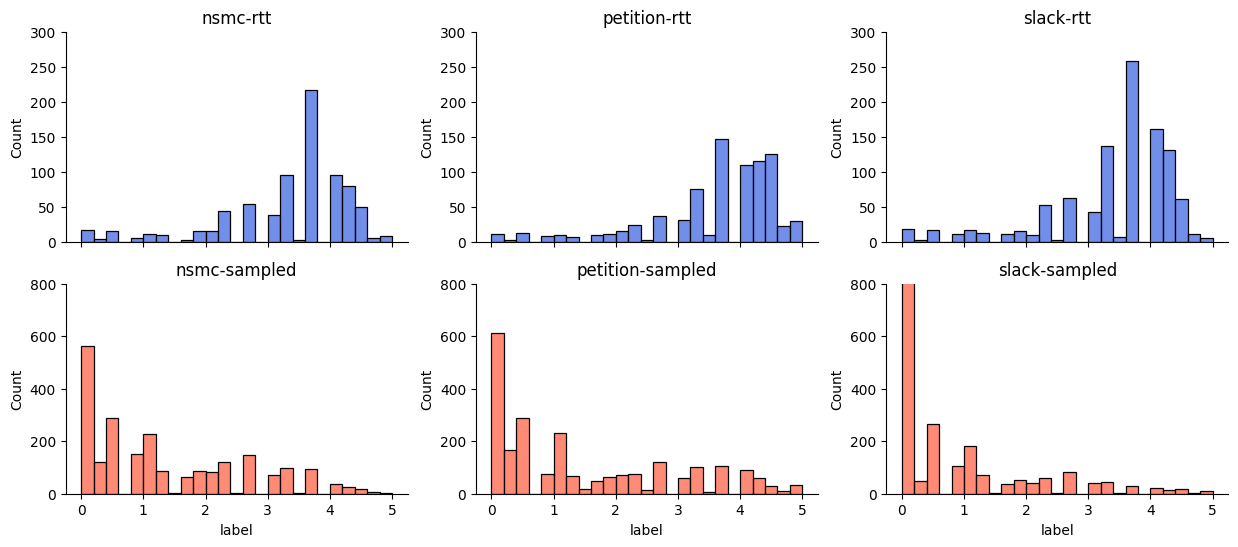

In [34]:
f, axes = plt.subplots(2, 3, figsize=(15, 6), sharex=True)
for i, source in enumerate(sources):
    sns.histplot(train[train["source"]==source]["label"], color="tomato" if i&1 else "royalblue", binwidth=0.2, ax = axes[i%2, i//2])
    axes[i%2, i//2].set_title(source)
    if i&1:
        axes[i%2, i//2].set_ylim(0, 800)
    else:
        axes[i%2, i//2].set_ylim(0, 300)
    for s in ['top', 'right']:
        axes[i%2, i//2].spines[s].set_visible(False)
plt.show()

In [19]:
df = train.copy()

In [46]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
random.seed(42)
X, _ = train_test_split(df[df['label'] < 0.2], train_size=0.6, stratify=df[df['label'] < 0.2]['source'])

In [47]:
df[df['label'] < 0.2]

,id,source,sentence_1,sentence_2,label,binary-label
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
14,boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,0.0,0.0
19,boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,2023 아시안컵 유치에 공동개최를 반대 합니다.,0.0,0.0
20,boostcamp-sts-v1-train-020,slack-sampled,앞머리 새로 하셨습니다. ^^,가방에 넣어 다니면서 조금씩 먹습니다. ^^,0.0,0.0
22,boostcamp-sts-v1-train-022,slack-sampled,답답할 때 보면 속이 뻥 뚫릴 것 같아요,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,0.0,0.0
...,...,...,...,...,...,...
9274,boostcamp-sts-v1-train-9274,nsmc-sampled,영화괜찮았구만 난리들이네 -_-,대만박스오피스 1위 대만 클라스 보소 -_-;;,0.0,0.0
9278,boostcamp-sts-v1-train-9278,petition-sampled,대한민국 정치인이 참~~~,조국아~~~조국아~~~나의 조국아~~~,0.0,0.0
9308,boostcamp-sts-v1-train-9308,slack-sampled,베이비 필터 끼우고 찍어봤습니당.,넘넘 반가웠습니당.,0.0,0.0
9313,boostcamp-sts-v1-train-9313,nsmc-sampled,엘호야때문에보긴하지만...루즈한감있습니다..,..글쎄다...쇼킹하긴하지만 노골적으로 할필요까진..;; 엽기적이다.,0.0,0.0


In [48]:
X

,id,source,sentence_1,sentence_2,label,binary-label
2172,boostcamp-sts-v1-train-2172,nsmc-sampled,우리집도 가난해서 백도 없고 좌절도 많았지만 난 부모님을 원망한 적은 한번도 없었다.,아무 정보도 없이 간걸 후회했다.,0.0,0.0
7290,boostcamp-sts-v1-train-7290,petition-sampled,"자사고,외고,국제고","국민연금 폐지,육아지원,집",0.0,0.0
7450,boostcamp-sts-v1-train-7450,slack-sampled,남인척 객관적인척.... ㅋㅋ,나름 정성 들임.. .ㅋㅋ,0.0,0.0
4952,boostcamp-sts-v1-train-4952,slack-sampled,백패킹 성지로 엄청 유명하더라구요.,엄청 향도 맛도 풍부하더라구요.,0.0,0.0
109,boostcamp-sts-v1-train-109,nsmc-sampled,영화의 재미 보다 짚라인 타 보고 싶다.,가난한 영화의 넘치는 여운..그녀의 말을 마저 듣고 싶다.,0.0,0.0
...,...,...,...,...,...,...
7580,boostcamp-sts-v1-train-7580,slack-sampled,직접 가서 먹으니 뜨끈한 우동이 같이 나와서 한그릇 더 시켰어요~,12월에 한 번 더 맛있는 거 먹자고 이야기하며 마무리하였습니다!,0.0,0.0
237,boostcamp-sts-v1-train-237,slack-sampled,어 저 되게 갸륵하게 나왔네요..ㅋㅋ,자꾸 이러시면 또 쪄갑니다….ㅋㅋ,0.0,0.0
3018,boostcamp-sts-v1-train-3018,slack-rtt,대박…5분대인데 24/46위라니 다들 얼마나 잘 뛰는거죠,좋아요... 5분대에 속하지만 24시간 46시간 근무합니다. 그들은 모두 얼마나 잘...,0.0,0.0
5067,boostcamp-sts-v1-train-5067,petition-sampled,집안 핵(방사능)문제도 관심 좀 가져주십시오.,청소년보호범 폐지해주십시오,0.0,0.0


In [49]:
X.index

Int64Index([2172, 7290, 7450, 4952,  109, 1261,  296, 4241, 3713,  479,
            ...
            8515, 4170, 7059, 5977, 2957, 7580,  237, 3018, 5067, 5878],
           dtype='int64', length=1271)

In [50]:
train_undersampled = train.drop(index=X.index)
train_undersampled

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


<Axes: xlabel='label', ylabel='Count'>

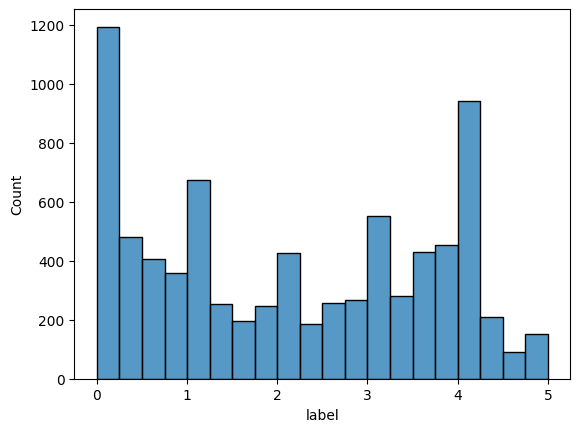

In [53]:
sns.histplot(train_undersampled.label, binwidth=0.25)

<Axes: xlabel='label', ylabel='count'>

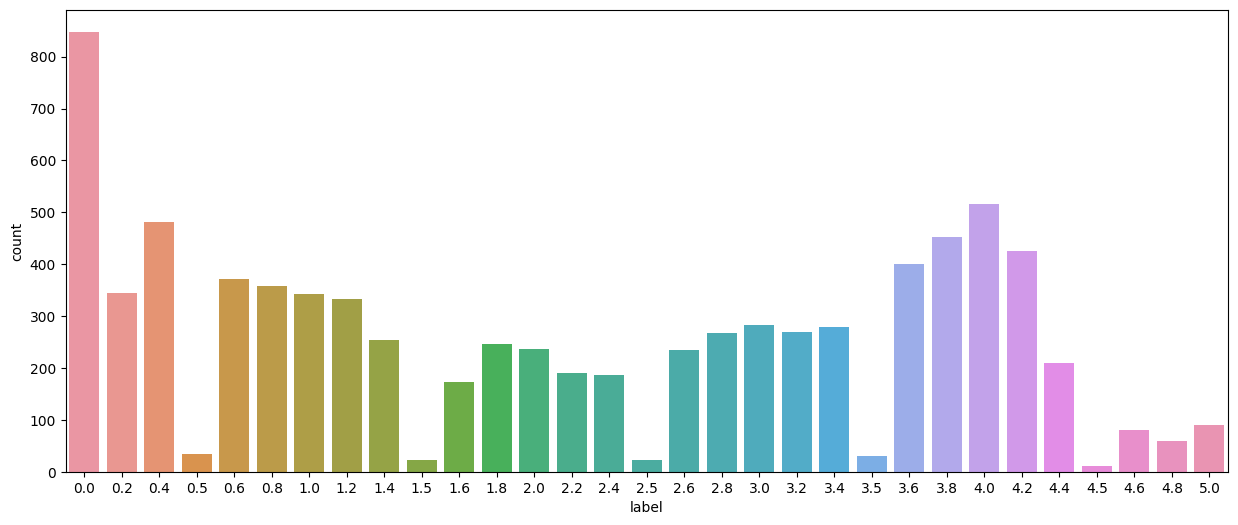

In [81]:
plt.figure(figsize = (15,6))
sns.countplot(train_undersampled.label, x=train_undersampled.label)

<Axes: xlabel='label', ylabel='count'>

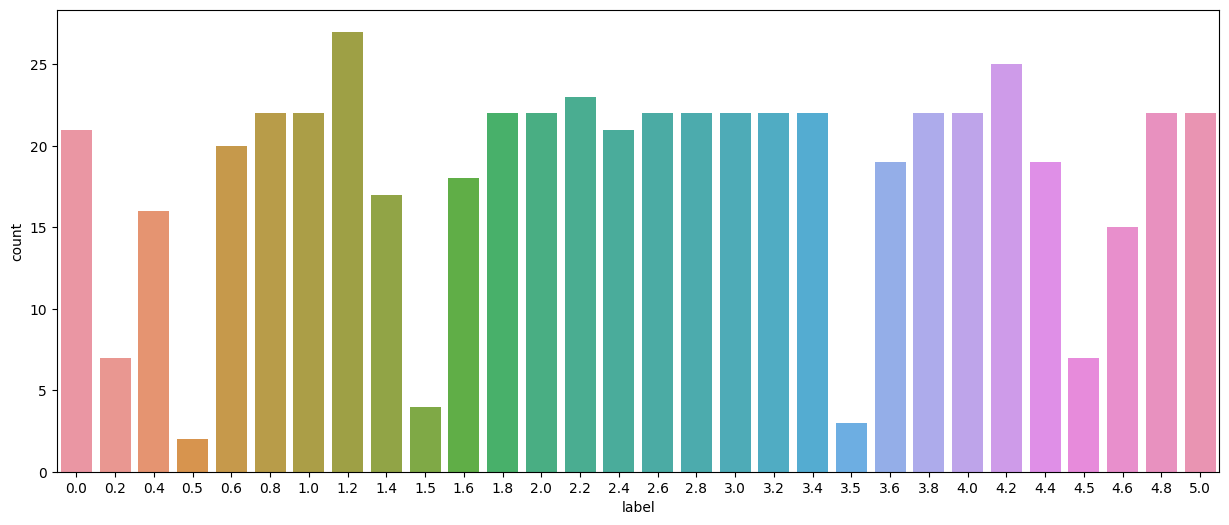

In [82]:
plt.figure(figsize = (15,6))
sns.countplot(dev.label, x=dev.label)

In [83]:
train

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [86]:
train_swap = train.copy()
train_swap.sentence_1, train_swap.sentence_2 = train_swap.sentence_2, train_swap.sentence_1

df_combined = pd.concat([train, train_swap])
df_combined.reset_index(drop=True)
df_combined[df_combined.duplicated(subset=["sentence_1", "sentence_2"])]

,id,source,sentence_1,sentence_2,label,binary-label


In [98]:
df_combined.to_csv("train_sentence_swap.csv", index=False)

In [89]:
train_resampled = train_undersampled.copy()
a = [train_resampled[train_resampled.label > 4.4].copy() for _ in range(3)]
b = train_resampled[train_resampled.label == 4.4].copy()
train_resampled = pd.concat([train_resampled, *a, b]).reset_index(drop=True)

<Axes: xlabel='label', ylabel='count'>

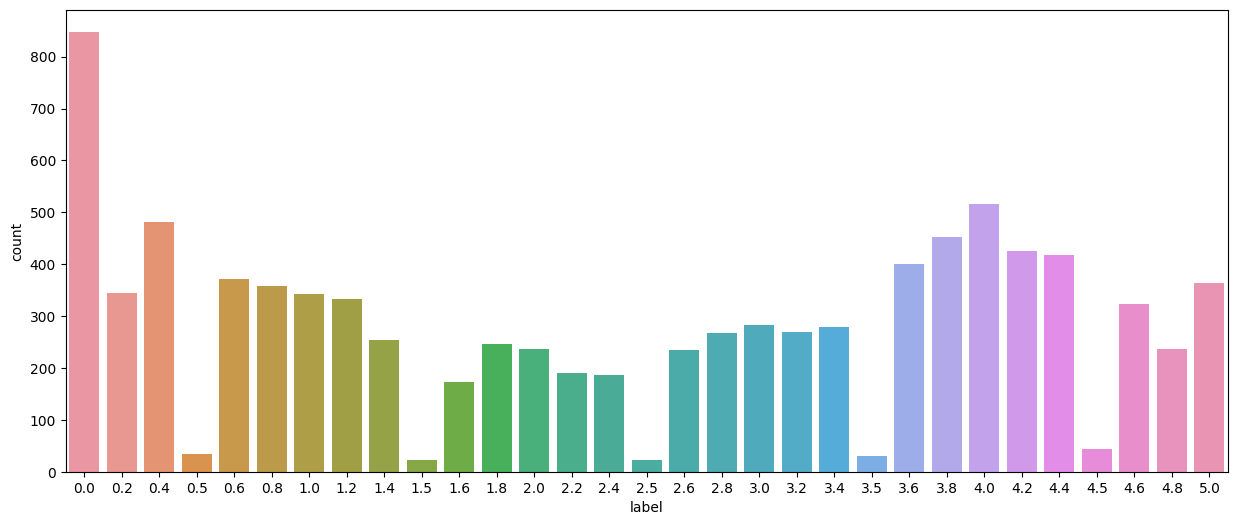

In [90]:
plt.figure(figsize = (15,6))
sns.countplot(train_resampled.label, x=train_resampled.label)

In [99]:
train_resampled.to_csv("train_resampled.csv", index=False)

In [97]:
train_resampled_swap = train_resampled.copy()
train_resampled_swap.sentence_1, train_resampled_swap.sentence_2 = train_resampled_swap.sentence_2, train_resampled_swap.sentence_1

train_resampled_swap = pd.concat([train_resampled, train_resampled_swap])
train_resampled_swap = train_resampled_swap.reset_index(drop=True)


In [100]:
train_resampled_swap.to_csv("train_resampled_swap.csv", index=False)